In [3]:
"""
Landon Buell
PHYS 799
MFBE
3 Dec 2020
"""

import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

In [7]:
def GetWavFiles():
    """ Get all Wav files in CWD"""
    path = os.getcwd()
    wavFiles = []
    files = os.listdir(path)
    for file in files:
        if file.endswith(".wav"):
            wavFiles.append(file)
    return wavFiles

wavFiles = GetWavFiles()
print(wavFiles)

HertzToMel = lambda h : 2595*np.log10(1+ h/700)
MelToHertz = lambda m : 700*(10**(m/2595)-1)

['AltoSax-A4.wav', 'CELLO-F4.wav', 'Clarinet-Gs5.wav', 'FLUTE-Cs6.wav', 'FRENCHHORN-Cs4.wav', 'GUITAR-B2.wav', 'Oboe.Bb4.R.wav', 'SawtoothWave-220.wav', 'SineWave-220.wav', 'SquareWave-220.wav', 'TriangleWave-220.wav', 'Trumpet-B3.wav', 'Tuba-A2.wav', 'Viola-G4.wav', 'Violin-G4.wav', 'WhiteNoise-190.wav']


In [12]:
_hertz = fftpack.fftfreq(n=2048,d=1/44100)
pts = np.where((_hertz>=0)&(_hertz<=12000))
frequencyPoints = _hertz[pts]

In [32]:
def PlotFilterBanksHz(filters,freqSp):
    """ Plot Mel Filter Banks """
    plt.figure(figsize=(16,8))
    plt.xlabel("Frequency [Hz]",size=30,weight='bold')
    plt.ylabel("Amplitude",size=30,weight='bold')
    
    for i in range (len(filters)):
        plt.plot(freqSp,filters[i],label='Filter '+str(i))
    
    plt.hlines(0,0,len(filters[0]),color='black')
    plt.vlines(0,0,1,color='black')
    
    plt.xticks(size=20,weight='bold')
    plt.yticks(size=20,weight='bold')
    
    plt.grid()
    plt.tight_layout()
    plt.legend(fontsize=20)
    
    plt.savefig("MelFilterBanks.png")
    plt.show()
    

In [33]:
def MelFilters (lowHz=0,highHz=12000,n_filters=12):
    """ 
    Compute the first 'm' Mel Frequency Ceptral Coefficients 
    --------------------------------
    n_filters (int) : Number of mel filters to use in frequency spectrum
    --------------------------------
    return filterBanks ( n_filters x self.npts) array
    """
    rate = 44100
    npts = 2048
    lowMelFreq = HertzToMel(lowHz)        # low bnd frequency
    highMelFreq = HertzToMel(highHz)      # high bnd frequency
    melPts = np.linspace(lowMelFreq,highMelFreq,n_filters+2)
    hertzPts = MelToHertz(melPts)              # convert to hz
    _bin = np.floor((npts+1)*hertzPts/rate)

    filterBanks = np.zeros((n_filters,npts),dtype=np.float32)
    for m in range (1,n_filters+1,1): # each filter
        freqLeft = int(_bin[m-1])
        freqCenter = int(_bin[m])
        freqRight = int(_bin[m+1])

        for k in range(freqLeft,freqCenter):
            filterBanks[m-1,k] = (k - _bin[m-1]) / (_bin[m] - _bin[m-1])
        for k in range(freqCenter,freqRight):
            filterBanks[m-1,k] = (_bin[m+1] - k) / (_bin[m+1] - _bin[m])

    filterBanks = filterBanks[:,:len(frequencyPoints)]
    return filterBanks

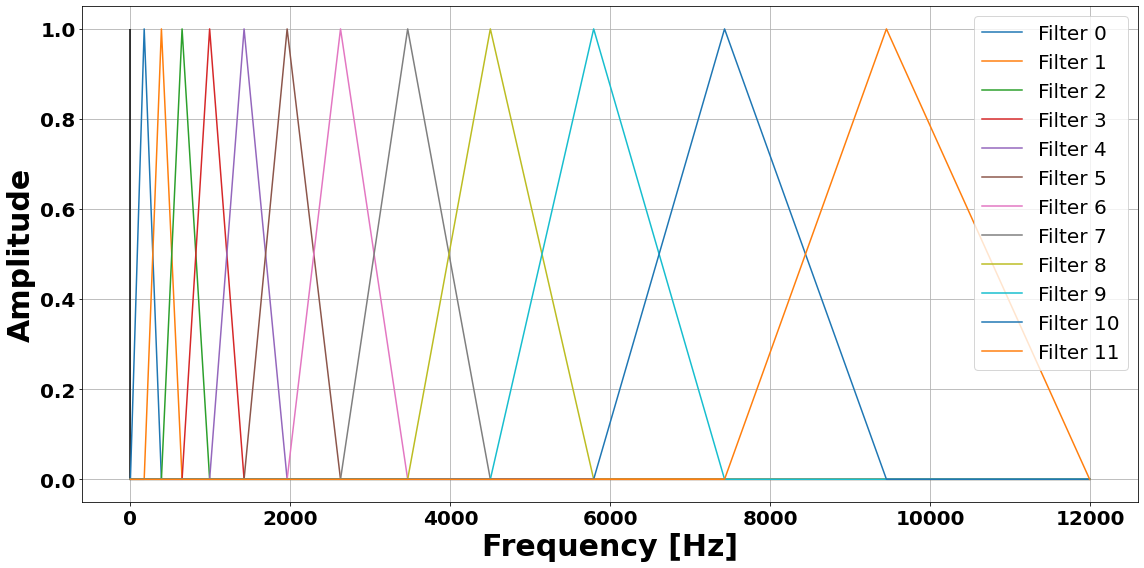

In [34]:
filters = MelFilters()
PlotFilterBanksHz(filters,frequencyPoints)